### Importación de datos



In [1]:
# importar librerias que se utilizaran
import matplotlib.pyplot as plt  # para la visualización de los datos
import seaborn as sns
import numpy as np


In [14]:
import pandas as pd

# Define las URLs de los archivos CSV para cada tienda.
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Lee los archivos CSV desde las URLs y los carga en dataframes de pandas.
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Muestra las primeras filas del dataframe 'tienda' para una vista previa de los datos.
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


verificar si hay datos nulos en los DataFrame de cada tienda

In [20]:
tienda.isnull().sum()

,0
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


In [21]:
tienda2.isnull().sum()

,0
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


In [22]:
tienda3.isnull().sum()

,0
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


In [23]:
tienda4.isnull().sum()

,0
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


#1. Análisis de facturación



## Ingreso total por cada tienda

In [3]:
#Definimos una función calcular del total de ventas por tienda

def suma_ventas(df):
    return {
        'Total_Ventas': df['Precio'].sum(),
        'Promedio_Ventas': df['Precio'].mean(),
    }

sumatorias = {
    'Tienda 1': suma_ventas(tienda),
    'Tienda 2': suma_ventas(tienda2),
    'Tienda 3': suma_ventas(tienda3),
    'Tienda 4': suma_ventas(tienda4)
}

sumatorias_df = pd.DataFrame(sumatorias).T  # Lo transpone (.T) para que cada tienda sea una fila.
print(sumatorias_df.to_string(formatters={'Total_Ventas': '{:.3f}'.format, 'Promedio_Ventas': '{:.3f}'.format})) # Formatea los números a 3 decimales.

           Total_Ventas Promedio_Ventas
Tienda 1 1150880400.000      487867.910
Tienda 2 1116343500.000      473227.427
Tienda 3 1098019600.000      465459.771
Tienda 4 1038375700.000      440362.892


/tmp/ipython-input-3955905215.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Ingresos Totales', data=plot_data, palette='viridis')


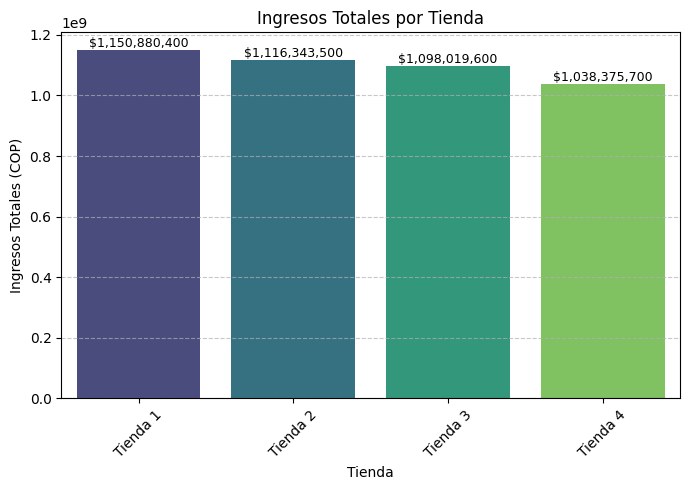

In [4]:
# crear figura
plt.figure(figsize=(7, 5))

# Prepare data for plotting: convert index to a column and rename columns
plot_data = sumatorias_df.reset_index()
plot_data.columns = ['Tienda', 'Ingresos Totales', 'Promedio Ventas']

# grafico de barras
sns.barplot(x='Tienda', y='Ingresos Totales', data=plot_data, palette='viridis')

#titulos y estiquetas
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales (COP)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# mostrar el valor sobre cada barra
for index, value in enumerate(plot_data['Ingresos Totales']):
    plt.text(index, value, f'${value:,.0f}', ha='center', va='bottom', fontsize=9)

# Rotar nombres si es necesario
plt.xticks(rotation=45)

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()

# 2. Ventas por categoría

## cantidad de productos vendidos por categoría en cada tienda

In [5]:
#Definimos una función calcular cantidad de productos por categoria
def ventas_por_categoria(df):
    return df.groupby('Categoría del Producto').size().sort_values(ascending=False)

ventas_categorias = {
    'Tienda 1': ventas_por_categoria(tienda),
    'Tienda 2': ventas_por_categoria(tienda2),
    'Tienda 3': ventas_por_categoria(tienda3),
    'Tienda 4': ventas_por_categoria(tienda4)
}

for tienda, ventas in ventas_categorias.items():
    print(f"\n--- Ventas por Categoría en {tienda} ---")
    print(ventas.to_string())


--- Ventas por Categoría en Tienda 1 ---
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171

--- Ventas por Categoría en Tienda 2 ---
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181

--- Ventas por Categoría en Tienda 3 ---
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177

--- Ventas por Categoría en Tienda 4 ---
Categoría del Produ

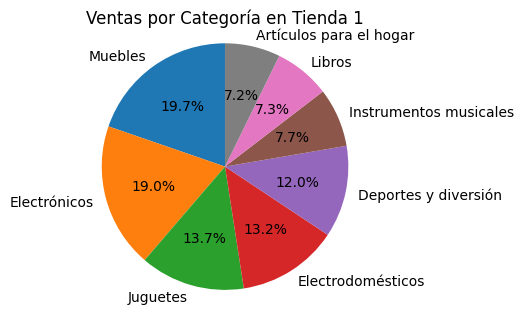

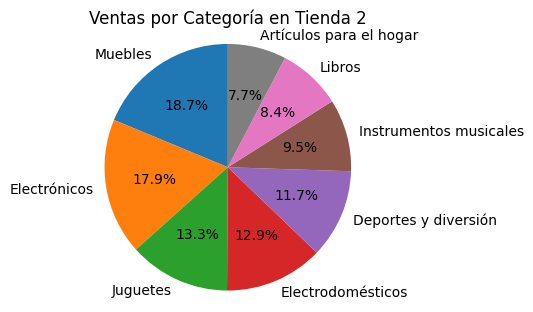

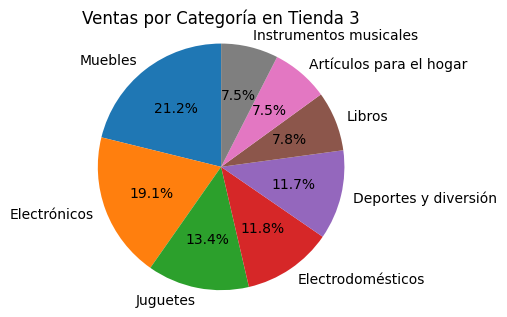

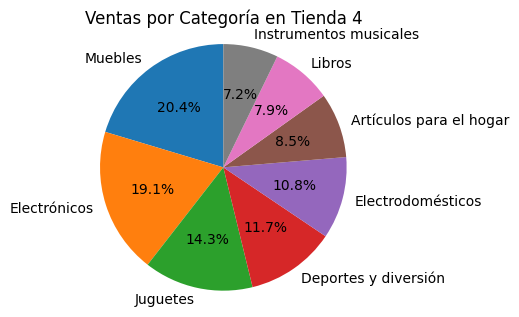

In [6]:

#Ploteamos las ventas por categoría de cada tienda
for tienda, ventas in ventas_categorias.items():
    plt.figure(figsize=(3.5, 3.5))
    plt.pie(ventas, labels=ventas.index,  autopct='%1.1f%%', startangle=90)
    plt.title(f'Ventas por Categoría en {tienda}')
    plt.axis('equal')


    plt.show()


# 3. Calificación promedio de la tienda


In [9]:
# Función para calcular promedio de calificación
def calificacion_promedio(df):
    return df['Calificación'].mean()

# Crear diccionario con resultados
calificaciones_promedio = {
    'Tienda 1': calificacion_promedio(tienda),
    'Tienda 2': calificacion_promedio(tienda2),
    'Tienda 3': calificacion_promedio(tienda3),
    'Tienda 4': calificacion_promedio(tienda4)
}


for tienda, calificacion in calificaciones_promedio.items():
    print(f"Calificación promedio en {tienda}: {calificacion:.2f}/5.00")

# Convertir a DataFrame y ordenar
calificaciones_df = (
    pd.DataFrame.from_dict(calificaciones_promedio,
                           orient='index',
                           columns=['Calificación Promedio'])
    .sort_values(by='Calificación Promedio', ascending=True)
)




Calificación promedio en Tienda 1: 3.98/5.00
Calificación promedio en Tienda 2: 4.04/5.00
Calificación promedio en Tienda 3: 4.05/5.00
Calificación promedio en Tienda 4: 4.00/5.00


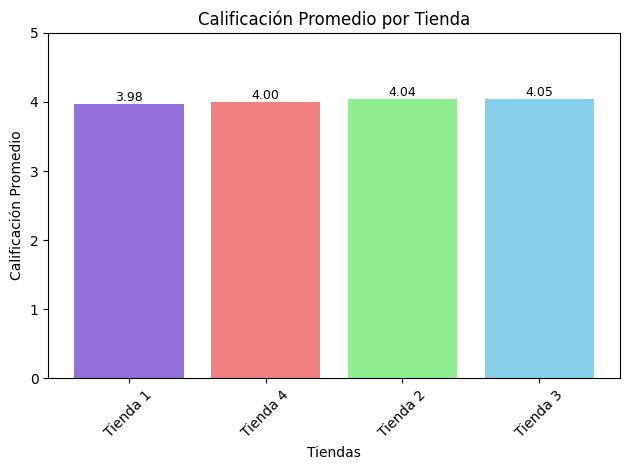

In [10]:
plt.figure()

# Define a list of colors for the bars
colors = ['mediumpurple', 'lightcoral', 'lightgreen', 'skyblue']

plt.bar(
    calificaciones_df.index,
    calificaciones_df['Calificación Promedio'],
    color=colors
)


plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')

# mostrar el valor sobre cada barra
for index, value in enumerate(calificaciones_df['Calificación Promedio']):
    plt.text(index, value, f'{value:,.2f}', ha='center', va='bottom', fontsize=9)


plt.ylim(0, 5)  # Escala típica de calificación
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Total de Ventas vs Calificación Promedio

In [11]:
# Unir ambos DataFrames
comparacion_df = sumatorias_df.join(calificaciones_df)

print(comparacion_df)

          Total_Ventas  Promedio_Ventas  Calificación Promedio
Tienda 1  1.150880e+09    487867.910131               3.976685
Tienda 2  1.116344e+09    473227.426876               4.037304
Tienda 3  1.098020e+09    465459.771089               4.048326
Tienda 4  1.038376e+09    440362.892282               3.995759


/tmp/ipython-input-3277150706.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  comparacion_df['Total_Ventas'][i],
/tmp/ipython-input-3277150706.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  comparacion_df['Calificación Promedio'][i],


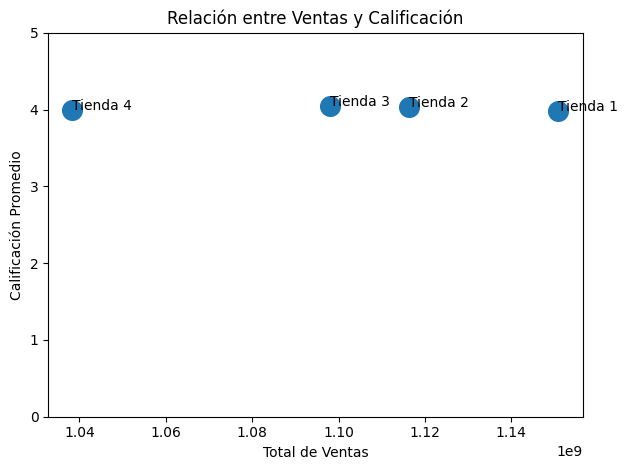

In [12]:

plt.figure()

plt.scatter(
    comparacion_df['Total_Ventas'],
    comparacion_df['Calificación Promedio'],
    s=200  # tamaño de los puntos
)

# Agregar etiquetas con el nombre de cada tienda
for i, tienda in enumerate(comparacion_df.index):
    plt.text(
        comparacion_df['Total_Ventas'][i],
        comparacion_df['Calificación Promedio'][i],
        tienda
    )

plt.title('Relación entre Ventas y Calificación')
plt.xlabel('Total de Ventas')
plt.ylabel('Calificación Promedio')

plt.ylim(0, 5)

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

## identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda

In [15]:
def productos_mas_menos_vendidos(df):

    ventas_producto = (
        df.groupby('Producto')
        .size()
        .sort_values(ascending=False)
    )

    mas_vendido = ventas_producto.idxmax()
    cantidad_mas = ventas_producto.max()

    menos_vendido = ventas_producto.idxmin()
    cantidad_menos = ventas_producto.min()

    return {
        'Producto Más Vendido': mas_vendido,
        'Cantidad Más Vendida': cantidad_mas,
        'Producto Menos Vendido': menos_vendido,
        'Cantidad Menos Vendida': cantidad_menos
    }

resultados_productos = {
    'Tienda 1': productos_mas_menos_vendidos(tienda),
    'Tienda 2': productos_mas_menos_vendidos(tienda2),
    'Tienda 3': productos_mas_menos_vendidos(tienda3),
    'Tienda 4': productos_mas_menos_vendidos(tienda4)
}

# Convertir a DataFrame para verlo mejor
productos_df = pd.DataFrame(resultados_productos).T

print(productos_df)

               Producto Más Vendido Cantidad Más Vendida  \
Tienda 1                    Armario                   60   
Tienda 2  Iniciando en programación                   65   
Tienda 3              Kit de bancas                   57   
Tienda 4                   Cama box                   62   

           Producto Menos Vendido Cantidad Menos Vendida  
Tienda 1             Celular ABXY                     33  
Tienda 2            Juego de mesa                     32  
Tienda 3  Bloques de construcción                     35  
Tienda 4       Guitarra eléctrica                     33  


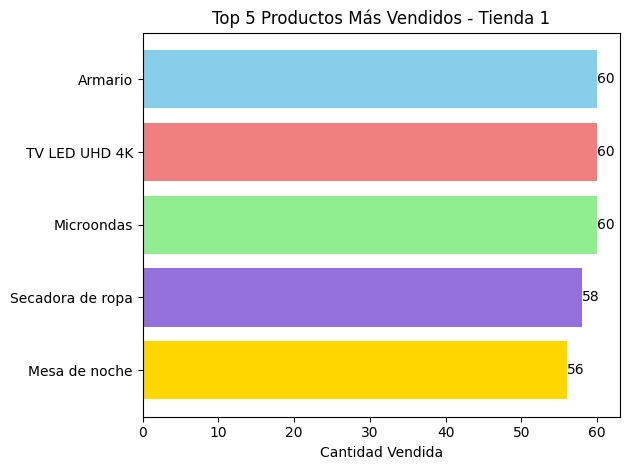

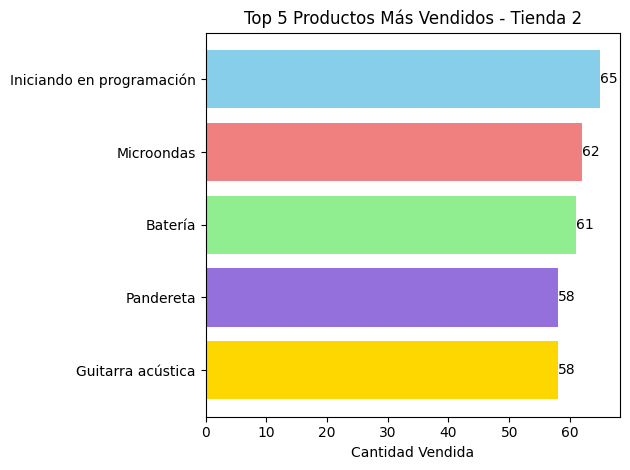

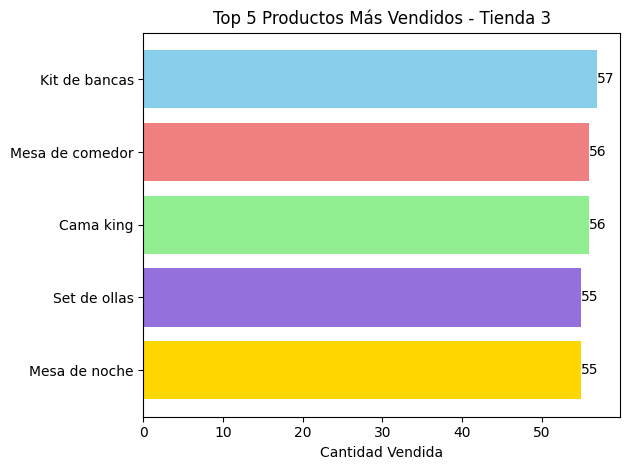

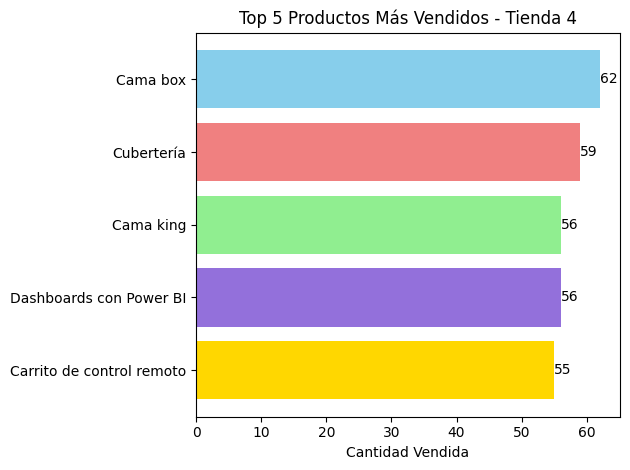

In [16]:
# Diccionario con todas las tiendas
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

for nombre_tienda, df in tiendas.items():

    ventas_producto = (
        df.groupby('Producto')
        .size()
        .sort_values(ascending=False)
    )

    top5 = ventas_producto.head(5)

    plt.figure()
    # Define a list of colors for the bars (using a reversed list for horizontal plot)
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'mediumpurple', 'gold']
    plt.barh(top5.index[::-1], top5.values[::-1], color=colors[::-1]) # Apply reversed colors

    # Add quantities on the bars
    for i, (producto, cantidad) in enumerate(top5.iloc[::-1].items()):
        plt.text(cantidad, i, f'{cantidad}', va='center', ha='left', fontsize=10)

    plt.title(f'Top 5 Productos Más Vendidos - {nombre_tienda}')
    plt.xlabel('Cantidad Vendida')

    plt.tight_layout()
    plt.show()

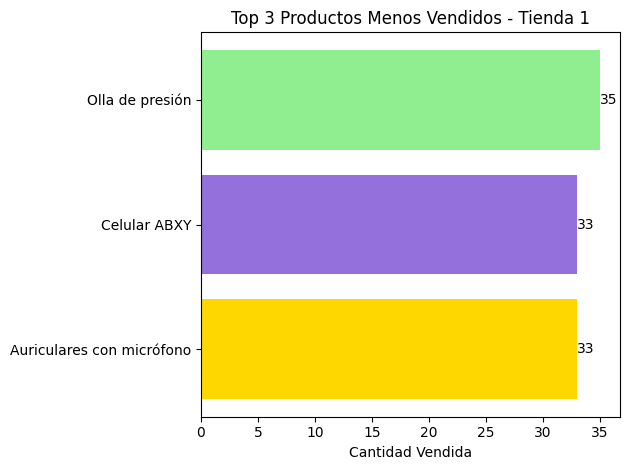

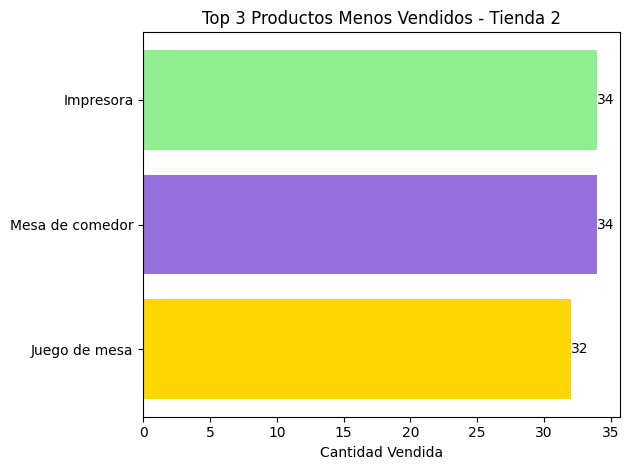

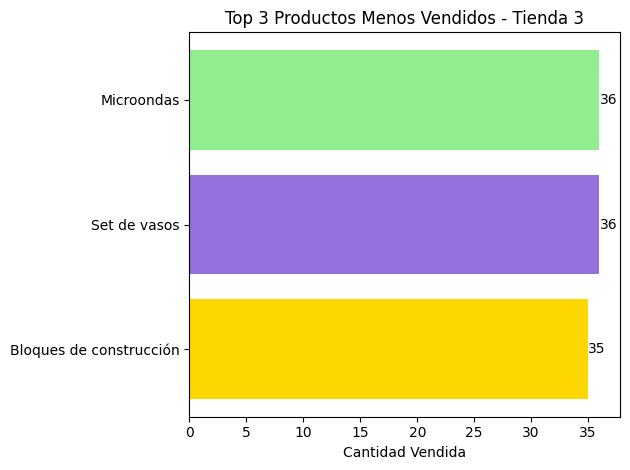

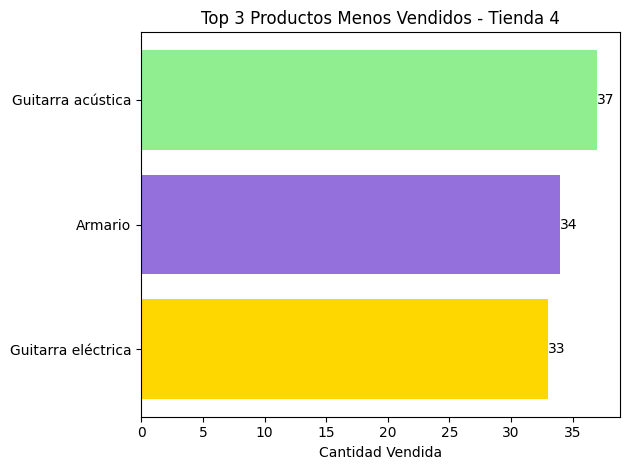

In [17]:
# Diccionario con todas las tiendas
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

for nombre_tienda, df in tiendas.items():

    ventas_producto = (
        df.groupby('Producto')
        .size()
        .sort_values(ascending=False)
    )

    top5 = ventas_producto.tail(3)

    plt.figure()
    # Define a list of colors for the bars (using a reversed list for horizontal plot)
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'mediumpurple', 'gold']
    plt.barh(top5.index[::-1], top5.values[::-1], color=colors[::-1]) # Apply reversed colors

    # Add quantities on the bars
    for i, (producto, cantidad) in enumerate(top5.iloc[::-1].items()):
        plt.text(cantidad, i, f'{cantidad}', va='center', ha='left', fontsize=10)

    plt.title(f'Top 3 Productos Menos Vendidos - {nombre_tienda}')
    plt.xlabel('Cantidad Vendida')

    plt.tight_layout()
    plt.show()

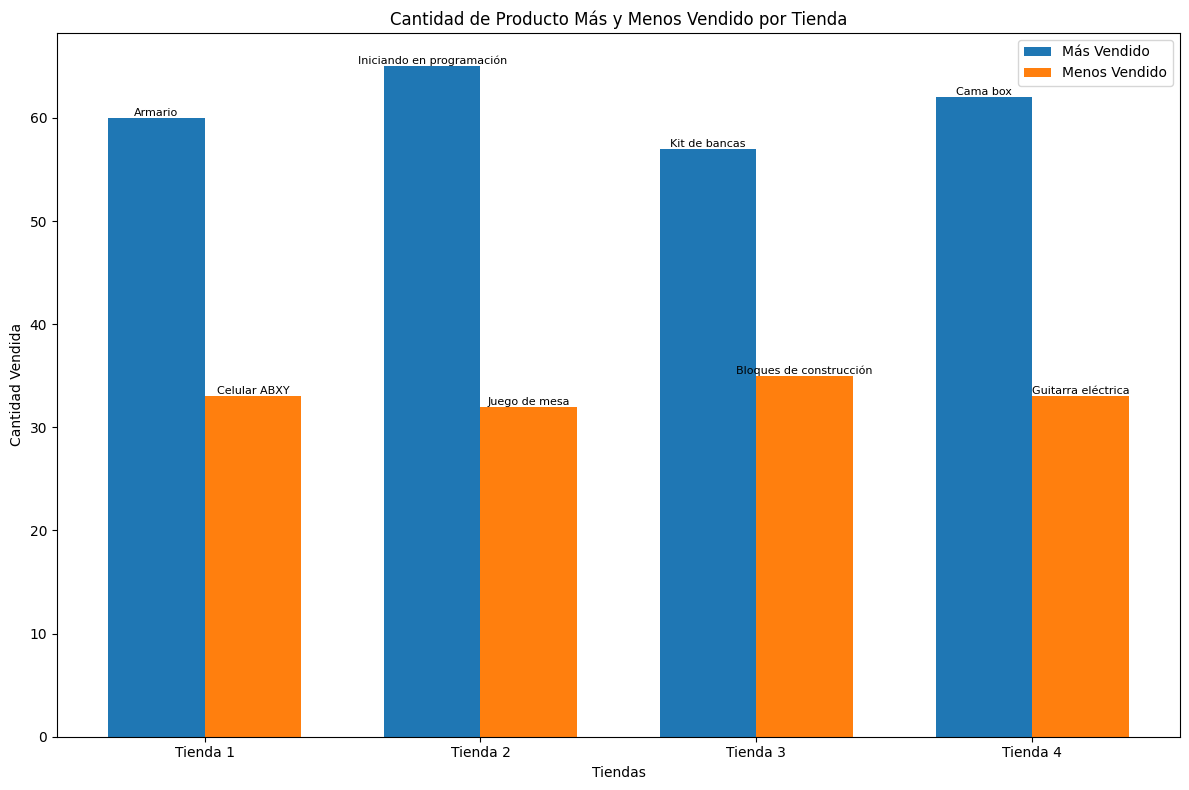

In [18]:
# Listas para guardar resultados
tiendas_nombres = []
cant_mas = []
cant_menos = []

for nombre_tienda, df in tiendas.items():

    ventas_producto = (
        df.groupby('Producto')
        .size()
        .sort_values(ascending=False)
    )

    tiendas_nombres.append(nombre_tienda)
    cant_mas.append(ventas_producto.max())
    cant_menos.append(ventas_producto.min())

# Posiciones para las barras
x = np.arange(len(tiendas_nombres))
ancho = 0.35

plt.figure(figsize=(12, 8)) # Increased figure size for labels

# Barras producto más vendido
bars_mas = plt.bar(x - ancho/2, cant_mas, width=ancho, label='Más Vendido')

# Barras producto menos vendido
bars_menos = plt.bar(x + ancho/2, cant_menos, width=ancho, label='Menos Vendido')

# Add labels for 'Más Vendido' products
for i, bar in enumerate(bars_mas):
    product_name = productos_df.loc[tiendas_nombres[i], 'Producto Más Vendido']
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        product_name,
        ha='center',
        va='bottom', # Adjust vertical alignment
        rotation=0, # Rotate text for better fit
        fontsize=8
    )

# Add labels for 'Menos Vendido' products
for i, bar in enumerate(bars_menos):
    product_name = productos_df.loc[tiendas_nombres[i], 'Producto Menos Vendido']
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        product_name,
        ha='center',
        va='bottom', # Adjust vertical alignment
        rotation=0, # Rotate text for better fit
        fontsize=8
    )

plt.xticks(x, tiendas_nombres)
plt.title('Cantidad de Producto Más y Menos Vendido por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Cantidad Vendida')

plt.legend()
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [19]:
def envio_promedio(df):
    return df['Costo de envío'].mean()

envios_promedio = {
    'Tienda 1': envio_promedio(tienda),
    'Tienda 2': envio_promedio(tienda2),
    'Tienda 3': envio_promedio(tienda3),
    'Tienda 4': envio_promedio(tienda4)
}

for tienda, envio in envios_promedio.items():
    print(f"Costo de envío promedio en {tienda}: ${envio:.2f}")

#DAtaframe datos obtenidos
envio_promedio_df = pd.DataFrame.from_dict(envios_promedio, orient='index', columns=['Costo de envío promedio'])

Costo de envío promedio en Tienda 1: $26018.61
Costo de envío promedio en Tienda 2: $25216.24
Costo de envío promedio en Tienda 3: $24805.68
Costo de envío promedio en Tienda 4: $23459.46


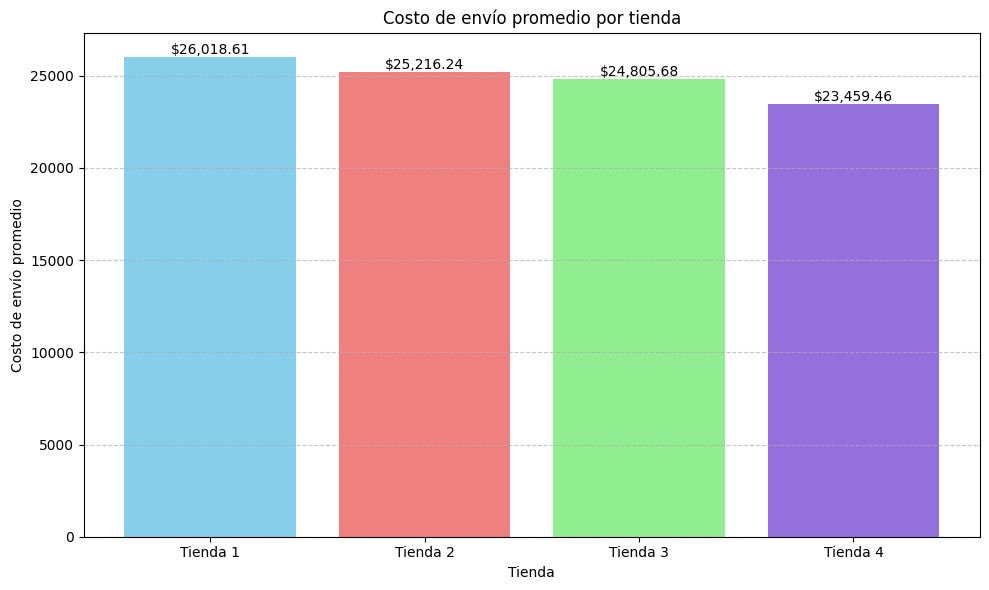

In [20]:
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'lightcoral', 'lightgreen', 'mediumpurple', 'gold']
plt.bar(envio_promedio_df.index, envio_promedio_df['Costo de envío promedio'], color=colors)
plt.title('Costo de envío promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de envío promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(envio_promedio_df['Costo de envío promedio']):
    plt.text(index, value, f'${value:,.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

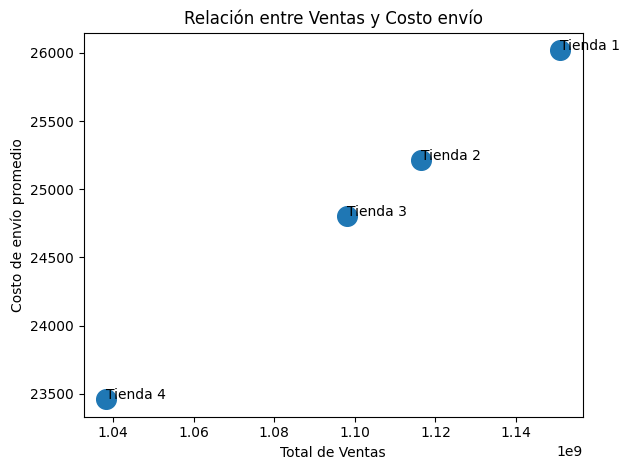

In [23]:
comparacion_envio_df = sumatorias_df.join(envio_promedio_df)

plt.figure()

plt.scatter(
    comparacion_envio_df['Total_Ventas'],
    comparacion_envio_df['Costo de envío promedio'],
    s=200  # tamaño de los puntos
)

# Agregar etiquetas con el nombre de cada tienda
for i, tienda_name in enumerate(comparacion_envio_df.index):
    plt.text(
        comparacion_envio_df['Total_Ventas'].iloc[i],
        comparacion_envio_df['Costo de envío promedio'].iloc[i],
        tienda_name
    )

plt.title('Relación entre Ventas y Costo envío')
plt.xlabel('Total de Ventas')
plt.ylabel('Costo de envío promedio')


plt.tight_layout()
plt.show()

# 6. Informe final

## Introducción

Este informe tiene como objetivo ayudar al Sr. Juan a decidir cuál de las cuatro tiendas de la cadena Alura Store debería vender para iniciar un nuevo emprendimiento. Para ello, se analizaron datos de ventas, rendimiento y reseñas de clientes con el fin de evaluar la eficiencia de cada tienda. A partir de este análisis, se identificará la tienda menos eficiente y se presentará una recomendación basada en los resultados obtenidos

## Desarrollo

1. Ingresos totales de las tiendas

La figura 1 contiene los datos obtenidos sobre los ingresos totales de cada una de las tiendas.

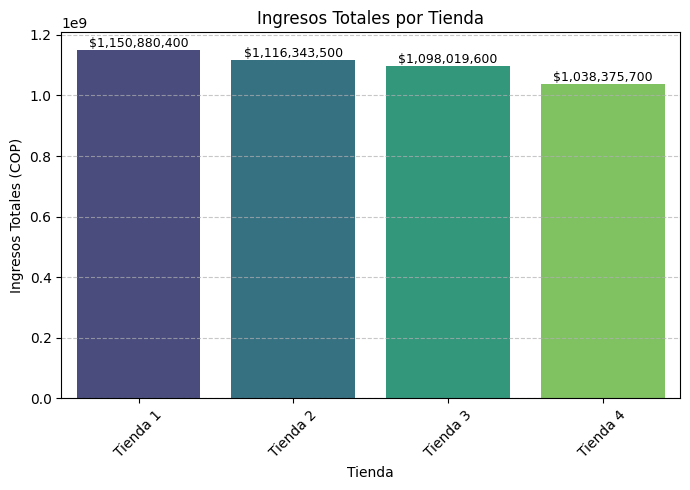

                    Figura 1. Ingresos totales tiendas

Como se observa en la Figura 1, la tienda 1 es la que tiene mayor ingreso mientras que la tienda 4 es la que tiene menor ingreso.

2. Categorias de productos más y menos vendidos

Las figuras 2, 3, 4 y 5 muestran las ventas por categoría para cada tienda.

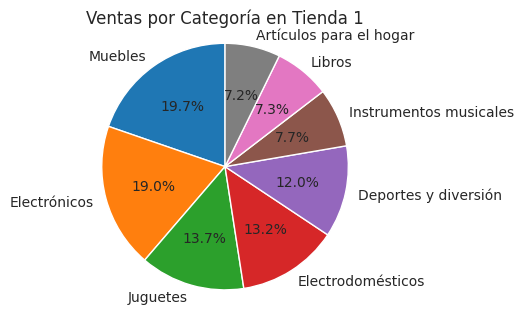

               Figura 2. Ventas por categoria tienda 1

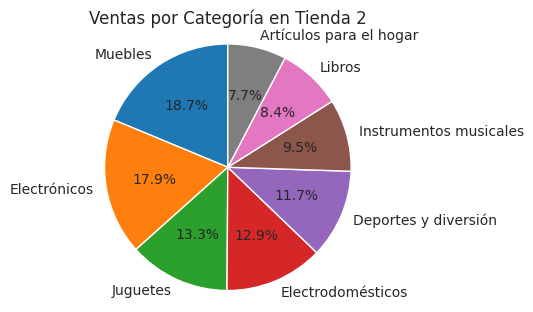

               Figura 3. Ventas por categoria tienda 2

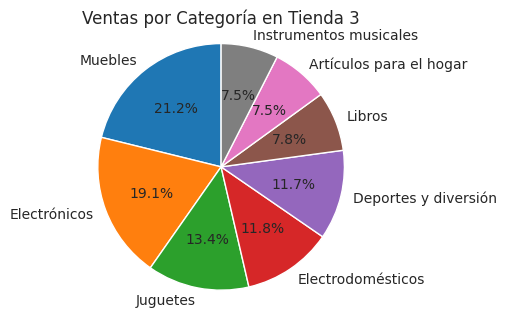

               Figura 4. Ventas por categoria tienda 3

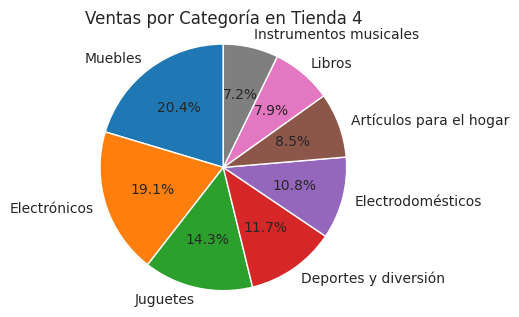

               Figura 5. Ventas por categoria tienda 4



De acuerdo con las figuras 2, 3, 4 y 5 el comportamiento de las ventas en las 4 tiendas es muy similar no hay una tienda en la que una categoría destaque más que en otra. Siendo la categorias más populares muebles, electronicos y juguetes.

3. Calificaciones promedio de los clientes por tienda

La figura 6 contiene la calificación promedio por tienda y la figura 7 la comparativa entre las ventas y la calificacíon promedio.

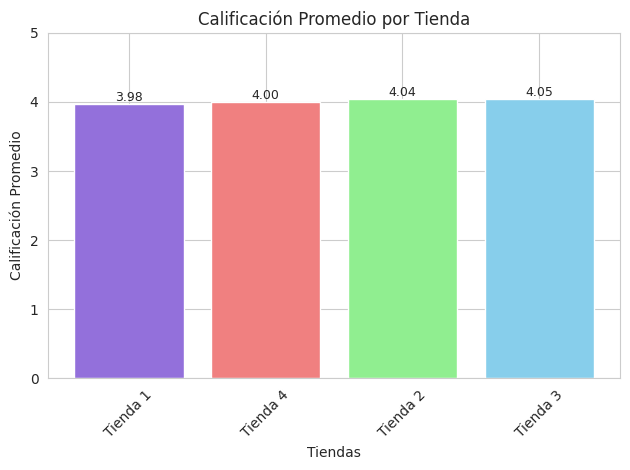

        Figura 6. Calificacion promedio de clientes por tienda
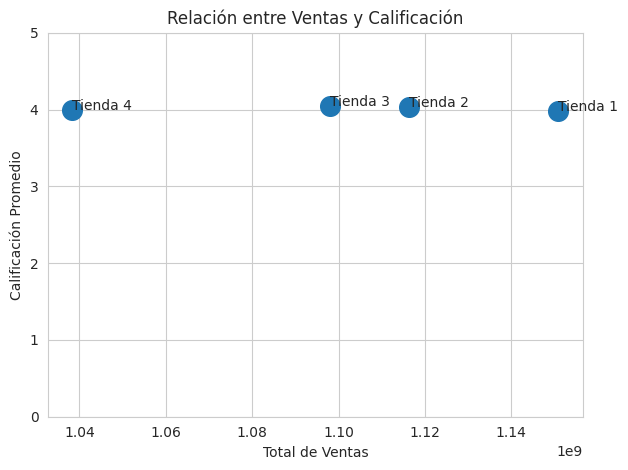

      Figura 7. Relacion entre ventas y calificación de clientes

De acuerdo con la figura 6 la tienda con mas alta satisfacción en clientes es la tienda 3 y la que tiene menor calificación es la tienda 1. Sin embargo al observar la figura 7, que relaciona las ventas con la calificación de los clientes, se muestra que entre las 4 tiendas la tienda 4 vende poco pero gusta mucho a los clientes mientras que la tienda 1 vende nucho y tiene una calificación un poco menor que no llega a ser mala.

4. Productos más y menos vendidos

La figura 8 muetra los productos más y menos vendidos por tienda.

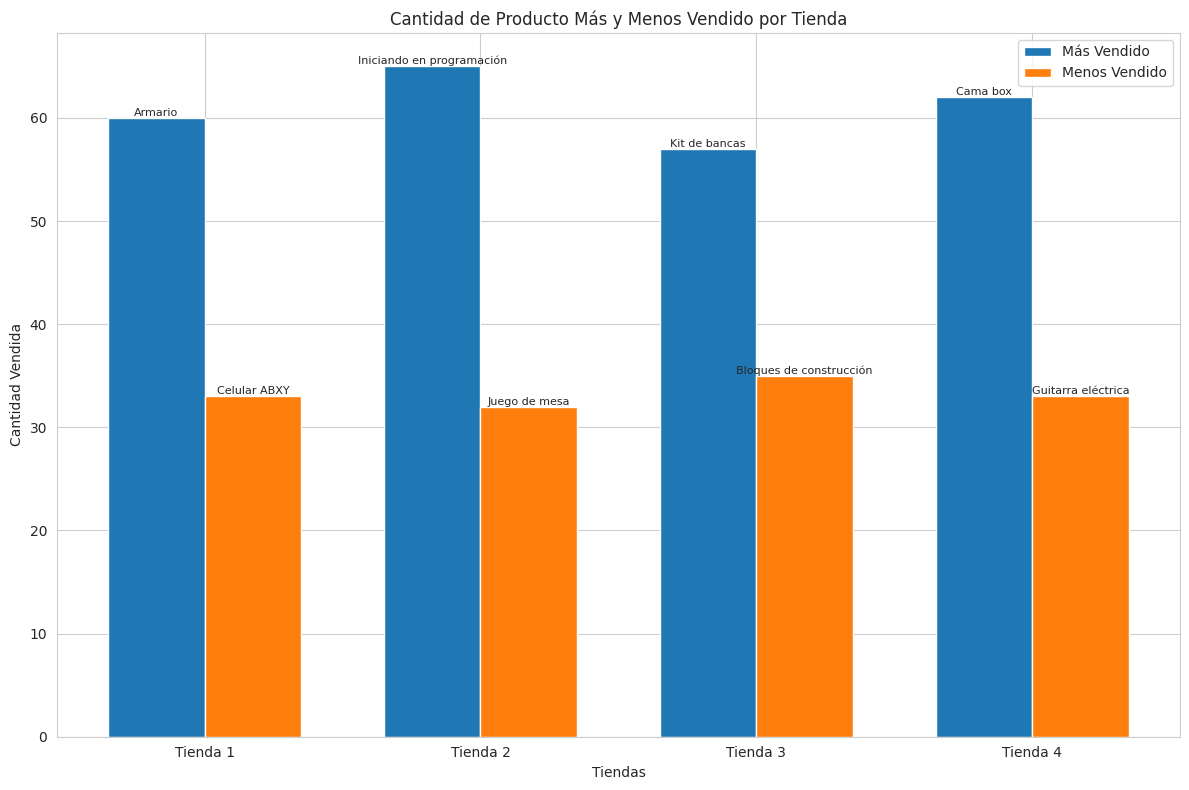

                    Figura 8. Productos más y menos vendidos por tienda

Se observa en la figura 8 que tanto los productos más vendidos como los menos vendidos no coinciden entre tiendas. Al comparar la diferencia entre el producto estrella y el de menor rotación, para la tienda 1 es de 27 productos, para la tienda 2 es de 33 productos, para la tienda 3 es de 22 productos y para la tienda 4 es de 29 productos. Si bien estos valores están relativamente cercanos esta diferencia entre mas pequeña indica mayor eficiencia operativa y menor vulneravilidad y la alta diferencia indica alto rendimiento en productos puntuales pero baja eficiciencia en diversificacíon de productos. De acuerdo con esto la tienda 3 es la que tiene menor diferencia seguida por la tienda 1 y la que tiene mayor diferencia es la tienda 2 seguida por la tienda 4.

5. Coste de envío promedio para cada tienda

La figura 9 muestra el costo de envío promedio por tienda.

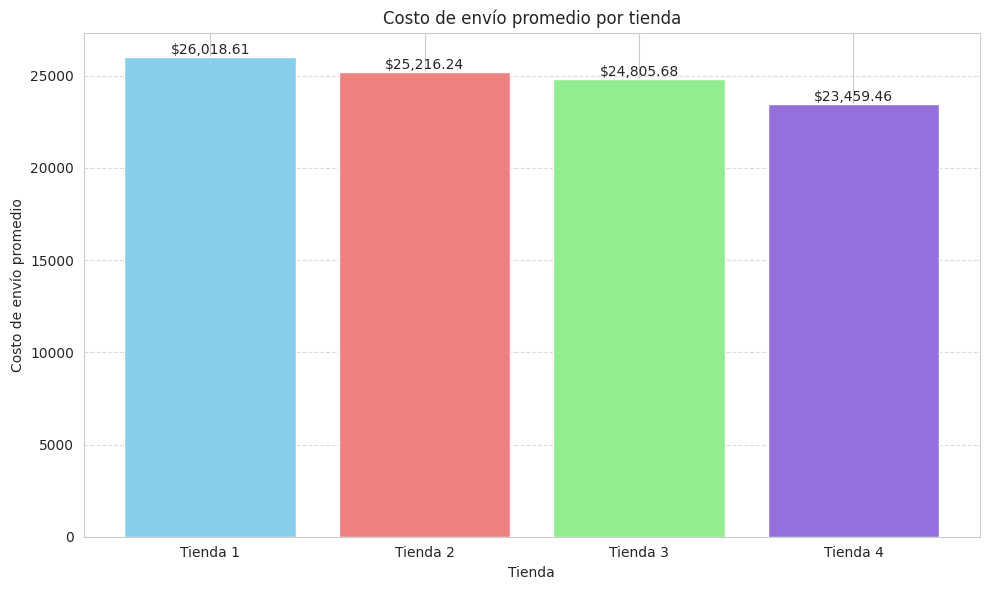

            Figura 9. Costo envío promedio para cada tienda

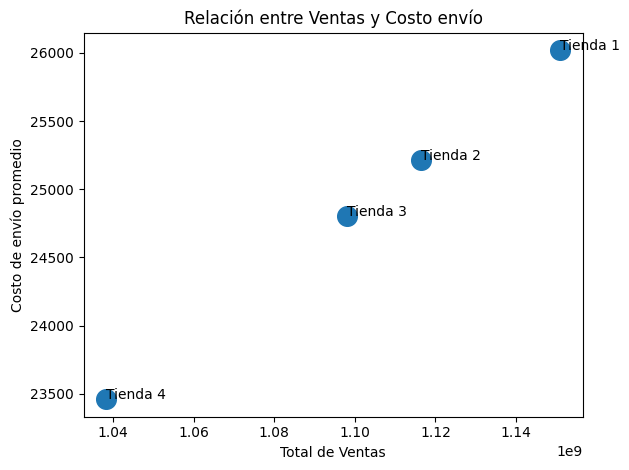

    Figura 10. Comparación ventas y costo promedio de envío

Como se observa en la figura 9, la tienda 1 tiene el valor del envío promedio más alto mientras que la tienda 4 tiene el más bajo, pero esto concuerda con la información anteriormente analizada, esto debido a que la tienda 1 tiene mayor numero de ventas y la tienda 4 menor número de ventas como se observa en la figura 10 por lo que tiene sentido que los valores de los envíos se comporten de manera similar a las ventas sin tener encuenta otros factores que afectan esta variable como la ubicacón geografica de los clientes.

## Conclusión

Según el análisis de ingresos, satisfacción del cliente, los productos más y menos vendidos y los costos de envío; La tienda que se debe vender es la tienda 4 debido a que esta presenta el menor ingreso total, no lidera en ninguna de las métricas analizadas y no muestra una ventaja competitiva clara. Esto sugiere un bajo rendimiento operativo en comparación a las otras 3 tiendas por lo que se recomienda considerar el cierre de esta tienda.